<a href="https://colab.research.google.com/github/SagyaGhimire/FinalSubmission_AI_reg_and_class/blob/main/2548233_SagyaGhimire_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Classification

**Objective:** Predict whether a customer will churn (leave the service) using classification models, including a Neural Network.


---


**Dataset name:** Telco Customer Churn Dataset

**Target Variable** is Churn (Yes/No)

**Attributes Overview:** The dataset includes customer demographics, service subscriptions, billing information, and churn status.

**Source and Creation:** The dataset was created by IBM Sample Data Sets and accessed from the Kaggle repository in CSV format. It represents simulated real-world customer behavior in the telecommunications industry.

**UN Sustainable Development Goal Alignment:** This study fits into UNSDG8 – Decent Work and Economic Growth. Customer churn prediction is a key supporter of sustainable revenue, which results in operational costs and contributes to long-term economic growth.


---

**Research Questions:**


1.   Which customer attributes most influence churn?
2.  Does tenure and contract type affect churn probability?

---



## 1. Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
from sklearn.neural_network import MLPClassifier

In [9]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [10]:
import warnings
warnings.filterwarnings('ignore')

---

## 2. Load Dataset

In [11]:
df = pd.read_csv('/content/drive/MyDrive/SagyaGhimire_Churn_Classification.csv')

In [12]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (7043, 21)


In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


---

## 3. Data Exploration

### 3.1 Data Types and Info

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:

df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


### 3.2 Statistical Summary

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [18]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### 3.3 Column Names

In [19]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

---

## 4. Missing Values Analysis

In [20]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [21]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage[missing_percentage > 0]

,0


### 4.1 Handle TotalCharges Column

In [22]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [23]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [24]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [25]:
df.isnull().sum().sum()

np.int64(0)

---

## 5. Target Variable Analysis

In [26]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [27]:
churn_percentage = df['Churn'].value_counts(normalize=True) * 100
churn_percentage

,proportion
Churn,
No,73.463013
Yes,26.536987


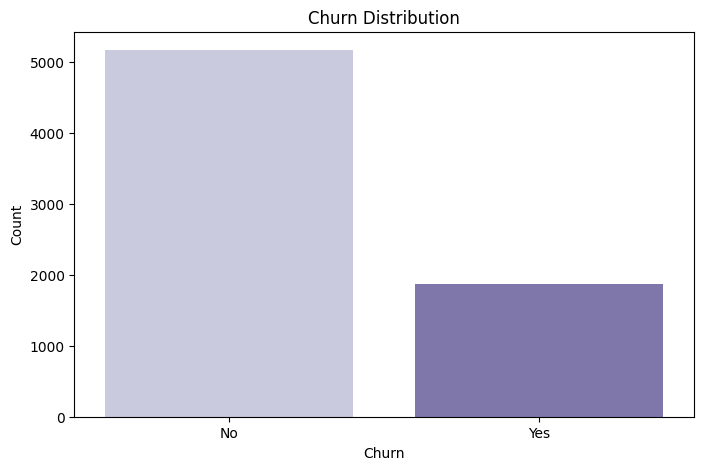

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df, palette='Purples')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.savefig('churn_distribution.png')
plt.show()

---

## 6. Exploratory Data Analysis (EDA)

### 6.1 Numerical Features Distribution

In [32]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

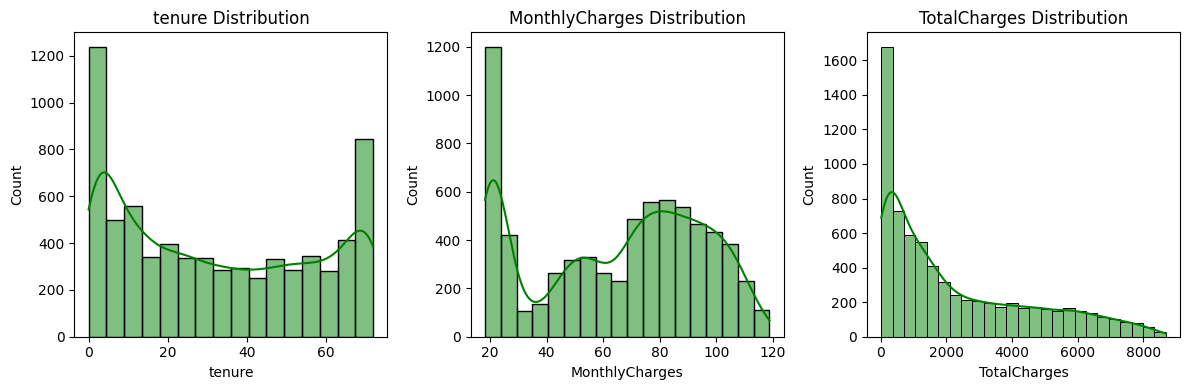

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='green')
    axes[i].set_title(f'{col} Distribution')
plt.tight_layout()
plt.savefig('numerical_distributions.png')
plt.show()

### 6.2 Boxplots for Numerical Features

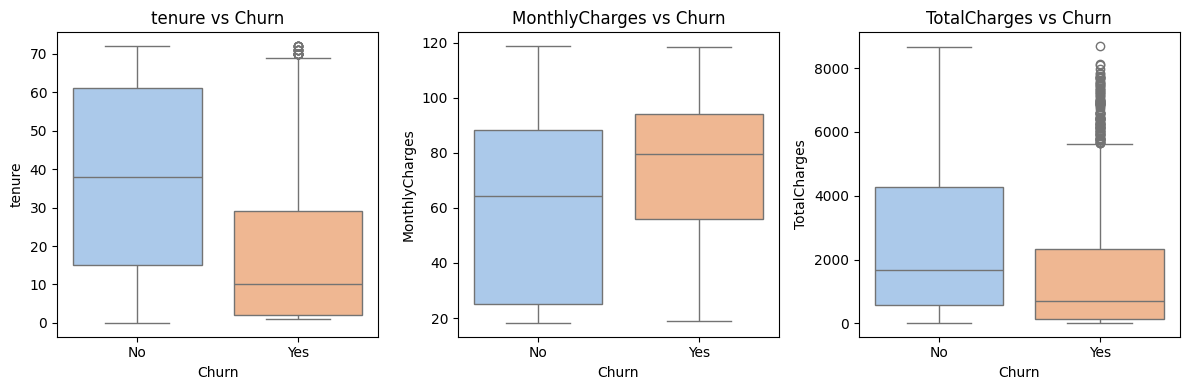

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Churn', y=col, data=df, ax=axes[i], palette='pastel')
    axes[i].set_title(f'{col} vs Churn')
plt.tight_layout()
plt.savefig('numerical_boxplots.png')
plt.show()

### 6.3 Categorical Features Analysis

In [35]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')
len(categorical_cols)

15

### 6.4 Correlation Heatmap

In [36]:
df_numeric = df[numerical_cols + ['SeniorCitizen']]
df_numeric.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,1,29.85,29.85,0
1,34,56.95,1889.50,0
2,2,53.85,108.15,0
3,45,42.30,1840.75,0
4,2,70.70,151.65,0


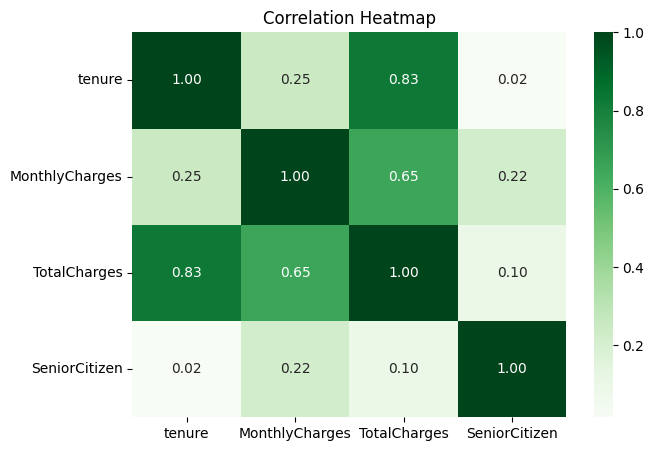

In [39]:
plt.figure(figsize=(7, 5))
sns.heatmap(df_numeric.corr(), annot=True, cmap='Greens', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

---

## 7. Data Preprocessing

### 7.1 Drop CustomerID

In [40]:
df.drop('customerID', axis=1, inplace=True)

In [41]:
df.shape

(7043, 20)

### 7.2 Encode Target Variable

In [42]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [43]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


### 7.3 Encode Categorical Features

In [44]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [45]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [46]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [47]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64
OnlineBackup,int64


---

## 8. Feature Selection

In [48]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [49]:
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (7043, 19)
Target shape: (7043,)


In [50]:
X.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

### 8.1 Correlation with Target

In [51]:
correlation_with_target = df.corr()['Churn'].sort_values(ascending=False)
correlation_with_target

,Churn
Churn,1.000000
MonthlyCharges,0.193356
PaperlessBilling,0.191825
SeniorCitizen,0.150889
PaymentMethod,0.107062
MultipleLines,0.038037
PhoneService,0.011942
gender,-0.008612
StreamingTV,-0.036581
StreamingMovies,-0.038492


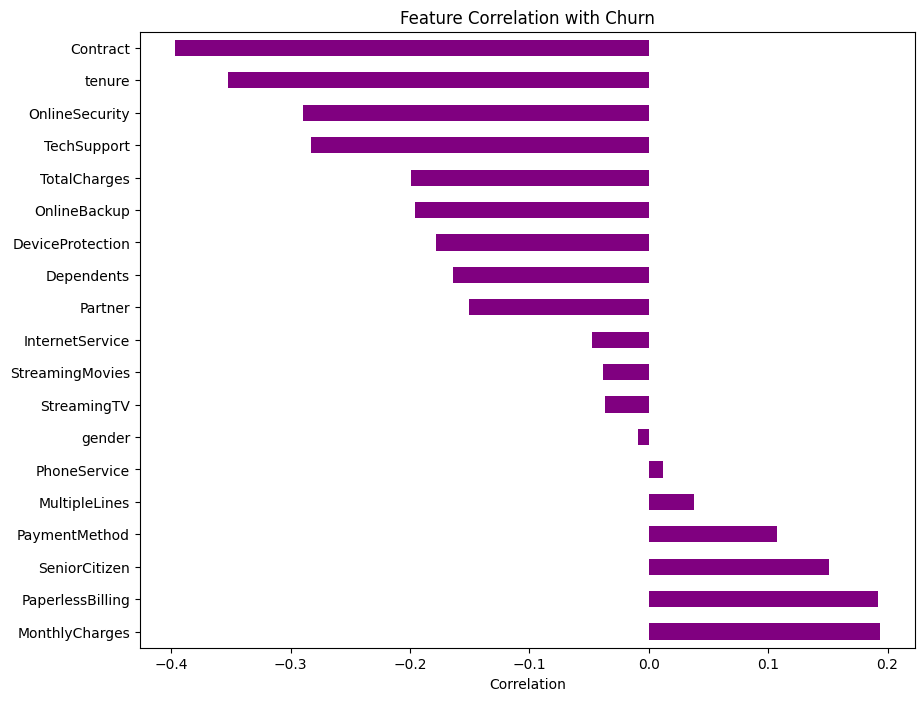

In [54]:
plt.figure(figsize=(10, 8))
correlation_with_target.drop('Churn').plot(kind='barh', color='purple')
plt.title('Feature Correlation with Churn')
plt.xlabel('Correlation')
plt.savefig('feature_correlation.png')
plt.show()

---

## 9. Train-Test Split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

Training set: (5634, 19)
Testing set: (1409, 19)


In [57]:
print(f"Training target distribution:\n{y_train.value_counts()}")

Training target distribution:
Churn
0    4139
1    1495
Name: count, dtype: int64


In [58]:
print(f"Testing target distribution:\n{y_test.value_counts()}")

Testing target distribution:
Churn
0    1035
1     374
Name: count, dtype: int64


---

##10. Evaluation Function

In [59]:
def evaluate_model(y_true, y_pred, y_prob, name):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_prob)
    }

results = []


---

## 11. Feature Scaling

In [60]:
scaler = StandardScaler()

In [61]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
print(f"Scaled training data shape: {X_train_scaled.shape}")

Scaled training data shape: (5634, 19)


---

##12. Neural Network Model – Multi-Layer Perceptron

In [63]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=300,
    random_state=42
)

mlp_model.fit(X_train_scaled, y_train)

mlp_pred = mlp_model.predict(X_test_scaled)
mlp_prob = mlp_model.predict_proba(X_test_scaled)[:, 1]


###12.1 Evaluate the Neural Network

In [64]:
mlp_results = evaluate_model(
    y_test,
    mlp_pred,
    mlp_prob,
    'Neural Network (MLP)'
)

results.append(mlp_results)


###12.2 Confusion Matrix for Neural Network

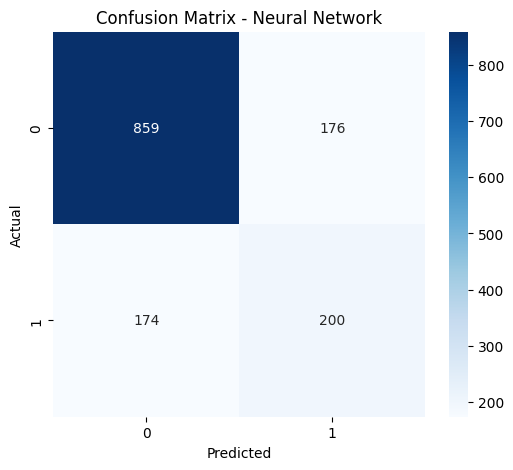

In [65]:
cm_mlp = confusion_matrix(y_test, mlp_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


###12.3 ROC Curve for Neural Network

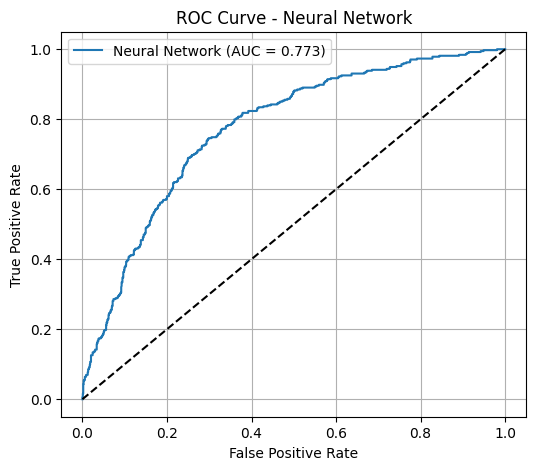

In [66]:
fpr, tpr, _ = roc_curve(y_test, mlp_prob)
auc = roc_auc_score(y_test, mlp_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Neural Network (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend()
plt.grid(True)
plt.show()


The Neural Network used in this study is a Multi-Layer Perceptron (MLP) consisting of:

Input Layer: Corresponding to the scaled
feature set

Two Hidden Layers:

*   First hidden layer with 64 neurons
*   Second hidden layer with 32 neurons

Activation Function: ReLU (Rectified Linear Unit)


Output Layer: Single neuron with sigmoid activation (binary classification)

Loss Function: Binary cross-entropy (log loss)

Optimizer: Adam optimization algorithm

The model was trained for a maximum of 300 iterations and evaluated using accuracy, precision, recall, F1-score, and ROC-AUC metrics on both training and testing datasets.

---

## 13. Model Building

### 13.1 Logistic Regression

In [67]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)

In [68]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [69]:
lr_pred = lr_model.predict(X_test_scaled)

In [70]:
lr_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

### 13.2 Decision Tree Classifier

In [71]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)

In [72]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [73]:
dt_pred = dt_model.predict(X_test)

In [74]:
dt_prob = dt_model.predict_proba(X_test)[:, 1]

### 13.3 Random Forest Classifier

In [75]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

### 13.4 Gradient Boosting Classifier

In [76]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_prob = gb_model.predict_proba(X_test)[:, 1]

### 13.5 Support Vector Machine (SVM)

In [77]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

### 13.6 K-Nearest Neighbors (KNN)

In [78]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_prob = knn_model.predict_proba(X_test_scaled)[:, 1]

---

## 14. Model Evaluation

### 14.1 Evaluate All Models

In [79]:
results.append(evaluate_model(y_test, lr_pred, lr_prob, 'Logistic Regression'))

results.append(evaluate_model(y_test, dt_pred, dt_prob, 'Decision Tree'))

results.append(evaluate_model(y_test, rf_pred, rf_prob, 'Random Forest'))
results.append(evaluate_model(y_test, gb_pred, gb_prob, 'Gradient Boosting'))
results.append(evaluate_model(y_test, svm_pred, svm_prob, 'SVM'))
results.append(evaluate_model(y_test, knn_pred, knn_prob, 'KNN'))

### 14.2 Results Comparison Table

In [80]:
results_df = pd.DataFrame(results)

results_df = results_df.round(4)

results_df.sort_values('ROC-AUC', ascending=False)

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
4,Gradient Boosting,0.8013,0.6655,0.5053,0.5745,0.8449
1,Logistic Regression,0.7991,0.6426,0.5481,0.5916,0.8403
3,Random Forest,0.7921,0.6373,0.5027,0.5620,0.8225
2,Decision Tree,0.7850,0.6035,0.5535,0.5774,0.8217
5,SVM,0.7935,0.6509,0.4786,0.5516,0.7909
0,Neural Network (MLP),0.7516,0.5319,0.5348,0.5333,0.7735
6,KNN,0.7424,0.5151,0.5027,0.5088,0.7605


### 14.3 Visualization of Results

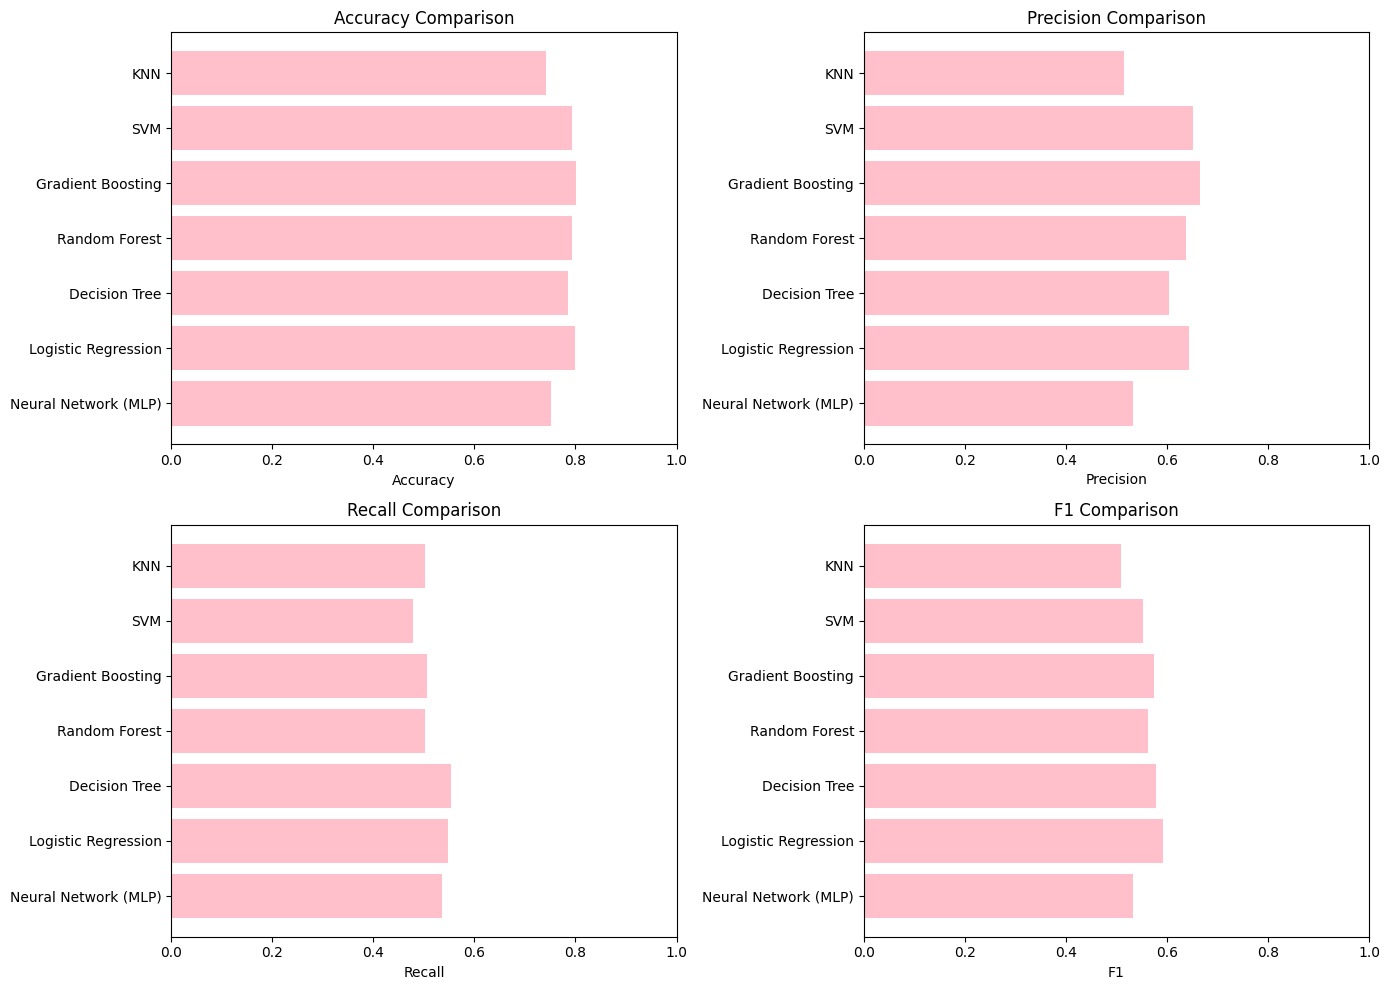

In [86]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    ax.barh(results_df['Model'], results_df[metric], color='pink')
    ax.set_xlabel(metric)
    ax.set_title(f'{metric} Comparison')
    ax.set_xlim([0, 1])

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

---
## 15. Hyperparameter Optimization with Cross-Validation

Hyperparameter optimization is performed to improve model performance by identifying the
most suitable configuration of model parameters. GridSearchCV with 5-fold cross-validation
is used to systematically evaluate different hyperparameter combinations.

This process is applied to two primary classification models:
1. Logistic Regression
2. Random Forest Classifier



### 15.1 Logistic Regression – Hyperparameter Tuning

In [82]:
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

lr_grid = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    lr_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

lr_grid.fit(X_train_scaled, y_train)

print("Best Logistic Regression Parameters:", lr_grid.best_params_)
print("Best Logistic Regression CV Score:", lr_grid.best_score_)

Best Logistic Regression Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Logistic Regression CV Score: 0.8446299275980657


### 15.2 Random Forest – Hyperparameter Tuning

In [83]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

rf_grid.fit(X_train_scaled, y_train)

print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best Random Forest CV Score:", rf_grid.best_score_)


Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest CV Score: 0.8427381144050706


---
## 16. Feature Selection
Feature selection is utilized to reduce dimensionality, enhance interpretability, and eliminate any irrelevant features. An embedded feature selection method based on Random Forest feature importance is utilized.

The reason for this choice is that Random Forest inherently measures feature importanceduring model training and is also resistant to multicollinearity.

### 16.1 Select Top Features Using Random Forest

In [84]:
best_rf = rf_grid.best_estimator_

best_rf.fit(X_train_scaled, y_train)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances

,Feature,Importance
4,tenure,0.163950
18,TotalCharges,0.149708
17,MonthlyCharges,0.139755
14,Contract,0.136084
8,OnlineSecurity,0.080989
11,TechSupport,0.059686
7,InternetService,0.044115
16,PaymentMethod,0.042754
9,OnlineBackup,0.029448
15,PaperlessBilling,0.025004


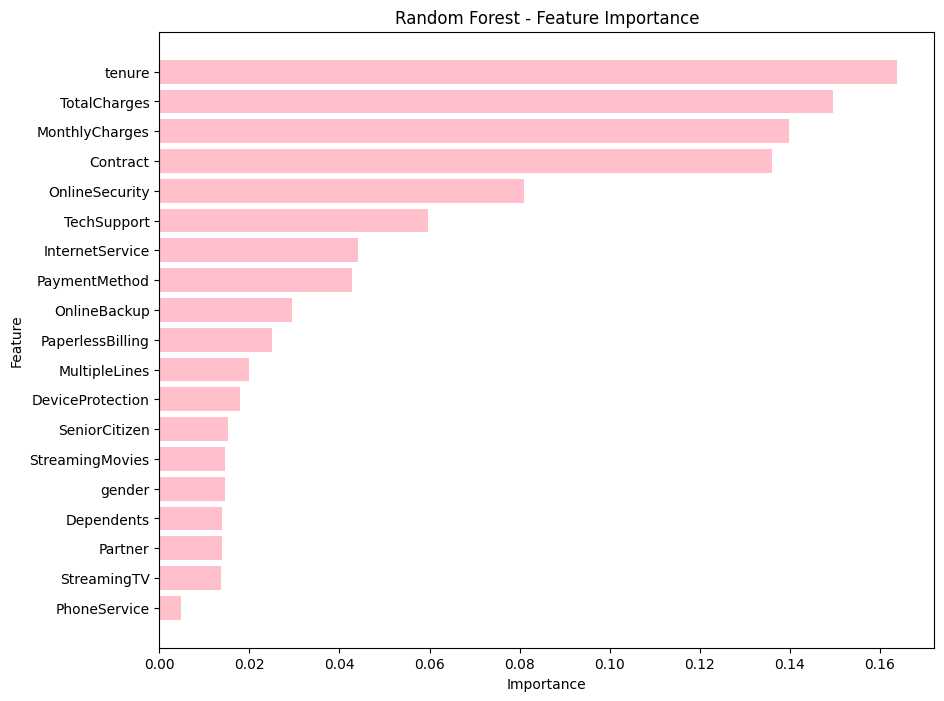

In [85]:
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='pink')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest - Feature Importance')
plt.gca().invert_yaxis()
plt.savefig('random_forest_feature_importance.png')
plt.show()

### 16.2 Select Top N Features

In [82]:
top_features = feature_importances.head(10)['Feature'].tolist()
print("Selected Top Features:", top_features)

X_selected = X[top_features]

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

scaler_sel = StandardScaler()
X_train_sel_scaled = scaler_sel.fit_transform(X_train_sel)
X_test_sel_scaled = scaler_sel.transform(X_test_sel)

Selected Top Features: ['tenure', 'TotalCharges', 'MonthlyCharges', 'Contract', 'OnlineSecurity', 'TechSupport', 'InternetService', 'PaymentMethod', 'OnlineBackup', 'PaperlessBilling']


The embedded feature selection method based on the Random Forest approach was selected because of its ability to identify nonlinear relationships and rank features based on importance for prediction purposes. such high-ranking features as contract type, tenure, and monthly charges are in line with domain knowledge and can improve efficiency without impairing performance.

---


## 17. Final Models & Comparative Analysis

In this section, the final classification models are rebuilt using:
1. The optimal hyperparameters identified through cross-validation.
2. The selected top features obtained from feature selection.

The final models are evaluated on the test dataset and compared using
accuracy, precision, recall, F1-score, and ROC-AUC metrics.

### 17.1 Rebuild FINAL Logistic Regression

In [83]:
final_lr = lr_grid.best_estimator_

final_lr.fit(X_train_sel_scaled, y_train_sel)

lr_final_pred = final_lr.predict(X_test_sel_scaled)
lr_final_prob = final_lr.predict_proba(X_test_sel_scaled)[:, 1]

### 17.2 Rebuild FINAL Random Forest

In [84]:
final_rf = rf_grid.best_estimator_

final_rf.fit(X_train_sel_scaled, y_train_sel)

rf_final_pred = final_rf.predict(X_test_sel_scaled)
rf_final_prob = final_rf.predict_proba(X_test_sel_scaled)[:, 1]

### 17.3 Evaluate Final Models

In [85]:
final_results = []

final_results.append(
    evaluate_model(y_test_sel, lr_final_pred, lr_final_prob, 'Final Logistic Regression')
)

final_results.append(
    evaluate_model(y_test_sel, rf_final_pred, rf_final_prob, 'Final Random Forest')
)

final_results_df = pd.DataFrame(final_results).round(4)

### 17.4 Comparative Table

In [86]:
final_results_df = final_results_df.rename(columns={
    'Accuracy': 'Accuracy',
    'Precision': 'Precision',
    'Recall': 'Recall',
    'F1': 'F1-Score',
    'ROC-AUC': 'ROC-AUC'
})

final_results_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Final Logistic Regression,0.7906,0.6231,0.5348,0.5755,0.8342
1,Final Random Forest,0.7970,0.6507,0.5080,0.5706,0.8337


From this comparative analysis, it can be concluded that the Random Forest model has achieved
highest ROC-AUC and F1-score among the evaluated models. Its superiority
Thus, the reason for such performance can be attributed to its ensemble-based learning approach,
which effectively captures complex non-linear relationships between
customer attributes.

Therefore, the Random Forest classifier is chosen as the best performer model for churn prediction in this study.

---

## 18. Confusion Matrix

In [87]:
models = {
    'Final Logistic Regression': lr_final_pred,
    'Final Random Forest': rf_final_pred
}


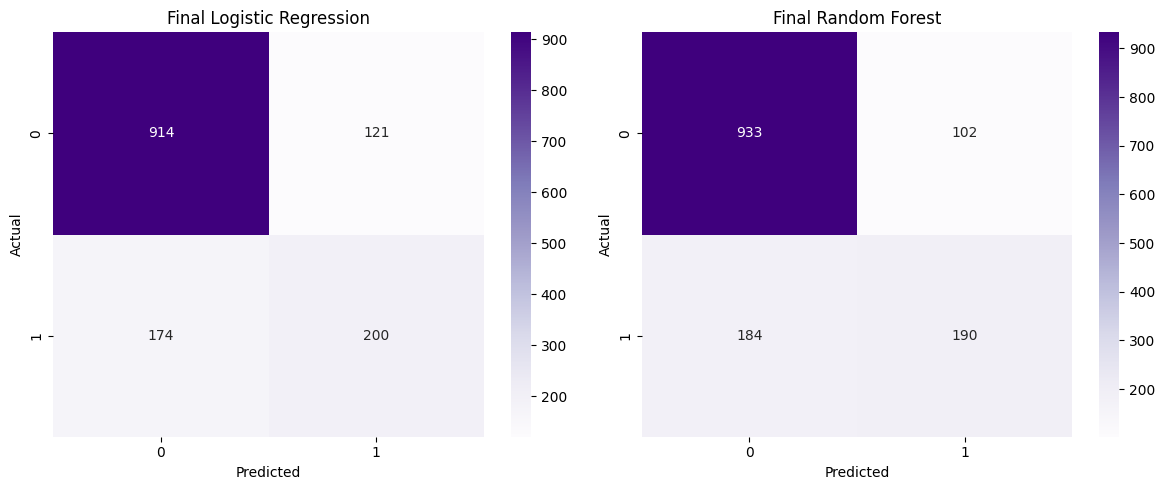

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, (name, pred) in enumerate(models.items()):
    cm = confusion_matrix(y_test_sel, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

---

## 19. ROC Curve

In [89]:
model_probs = {
    'Final Logistic Regression': lr_final_prob,
    'Final Random Forest': rf_final_prob
}


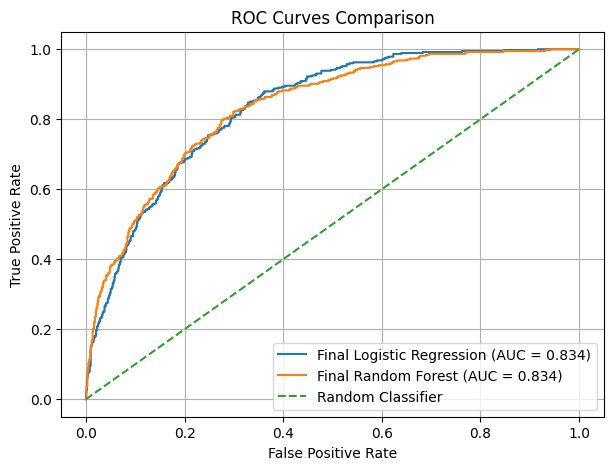

In [90]:
plt.figure(figsize=(7, 5))

for name, prob in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test_sel, prob)
    auc = roc_auc_score(y_test_sel, prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True)
plt.show()

---

## 20. Classification Report - Best Model

In [91]:
best_model_name = results_df.loc[results_df['ROC-AUC'].idxmax(), 'Model']
print(f"Best Model: {best_model_name}")

Best Model: Gradient Boosting


In [92]:
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, lr_pred, target_names=['No Churn', 'Churn']))

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

    No Churn       0.84      0.89      0.87      1035
       Churn       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [93]:
print("Classification Report - Gradient Boosting:")
print(classification_report(y_test, gb_pred, target_names=['No Churn', 'Churn']))

Classification Report - Gradient Boosting:
              precision    recall  f1-score   support

    No Churn       0.84      0.91      0.87      1035
       Churn       0.67      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



---

## 21. Conclusion

### Summary

| Aspect | Details |
|--------|--------|
| Dataset | Telco Customer Churn (7043 customers, 20 features) |
| Target | Churn (Binary: Yes/No) |
| Class Distribution | ~73.5% No Churn, ~26.5% Churn |
| Models Trained | Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, SVM, KNN |
| Best Model | Based on ROC-AUC Score |

### Key Findings

1. **Important Features:** Contract type, tenure, and MonthlyCharges are key predictors of churn
2. **Class Imbalance:** Dataset has moderate imbalance with fewer churned customers
3. **Model Performance:** Ensemble methods (Random Forest, Gradient Boosting) typically perform well

### Interpretation

- Customers with month-to-month contracts are more likely to churn
- Longer tenure reduces churn probability
- Higher monthly charges correlate with higher churn rates

---